In [ ]:
import glob
import numpy as np
import pandas as pd
from modules import show_mod

In [ ]:
officeList = glob.glob("data/*")

for office in officeList:
    boxCountList = glob.glob(office + "/RiskOfInfection/*/BoxCount.csv")
    print(boxCountList)

In [ ]:
# a = np.loadtxt('data/office1/RiskOfInfection/0_0/BoxCount_A.csv', delimiter=',')

# boxCountFNAME = boxCountList[0]
boxCountFNAME = 'data/office1/RiskOfInfection/0_0/BoxCount.csv'
print(boxCountFNAME)
df = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office7/RiskOfInfection/960_246_bout/BoxCount.csv'
print(boxCountFNAME)
df_max = pd.read_csv(boxCountFNAME)

boxCountFNAME = 'data/office22/RiskOfInfection/360_82_bout/BoxCount.csv'
print(boxCountFNAME)
df_min = pd.read_csv(boxCountFNAME)

- 荒木雅弘先生へメールしたが，「専門外」とのこと
- 学内に機械学習の専門家は他におられない？

$$ 1 - \mathrm{exp} \left( - \frac{N}{N_0} I \right) $$

$$ N_0 = 900 \space \mathrm{[viral copy / h]} $$
$$ N = nv \space \mathrm{[viral copy / h]} $$
$$ n = 10^{-7} \space \mathrm{[viral copy / ml]} $$

$$ I_{original} = 1 $$

$$ I_\alpha = 1.32 $$
$$ I_\delta = 1.5 I_\alpha $$
$$ I_{BA1} = 4.2 I_\delta $$
$$ I_{BA2} = 1.26 I_{BA1} $$
$$ I_{BA5} = 1.27 I_{BA2} $$
$$ I_{BA2.75} = 3.24 I_{BA5} $$

<!-- $$ I_\delta = 2.5 $$
$$ I_\omicron = 2.5 \cdot 1.4 $$
$$ I_{BA.5} = 1.3 I_{BA.2} $$
$$ I_{BA.2} = ? $$ -->

[BA.5とBA.2の比について](https://www.covid19-ai.jp/ja-jp/presentation/2022_rq1_simulations_for_infection_situations/articles/article367/)

In [ ]:
I = 10.
def RateOfInfection(volume):
    """
    感染率計算
    飛沫シミュレーションは１分間しか行っていないので，１分間あたりに換算
    """
    ROI = 1. - np.exp( - volume * 1e7 / (900./60.) * I)
    return ROI

In [ ]:
r = RateOfInfection(df['volume'])
r

a = df['RoI'].to_numpy()
a = r.to_numpy()
print(a.shape)
b = a.reshape(55, 60)
print(b.shape)

ROI_original = df['RoI'].to_numpy().reshape(55, 60)

In [ ]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_original.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_original, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(b.mean()))
#選んだ1個をプロット
show_mod.show_image(b, cbar=True, cmap=cmap, vmin=0)

In [ ]:
ROI_max = df_max['RoI'].to_numpy().reshape(40, 90)
ROI_min = df_min['RoI'].to_numpy().reshape(65, 85)

In [ ]:
#可視化用カラーマップの作成
# cmap = show_mod.make_colormap(["gray", "gray", "blue", "white", "red"])
cmap = show_mod.make_colormap(["blue", "white", "red"])


print('平均値：{:.2%}'.format(ROI_max.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_max, cbar=True, cmap=cmap, vmin=0)


print('平均値：{:.2%}'.format(ROI_min.mean()))
#選んだ1個をプロット
show_mod.show_image(ROI_min, cbar=True, cmap=cmap, vmin=0)

In [ ]:
threshold_array = np.linspace(0., 0.9, 10)

for threshold in threshold_array:
    print("====================================")
    print(threshold)
    rate_min = np.count_nonzero(ROI_min > threshold) / ROI_min.size
    rate_max = np.count_nonzero(ROI_max > threshold) / ROI_max.size
    print(rate_min, rate_max)
    print((rate_max - rate_min)/(rate_max + rate_min))


In [ ]:
import pandas as pd

df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_221015.csv")

df_summary

In [ ]:
df_summary[["aircon", "ventilation", "RoI"]].describe()

In [ ]:
df_summary["office"] = df_summary["casename"].map(lambda casename: casename.split("_")[0])

In [ ]:
df_summary

In [ ]:
import seaborn as sns

# sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office', diag_kind="hist")
sns.pairplot(df_summary[["aircon", "ventilation", "RoI", "office"]], hue='office')

In [ ]:
df_floating = pd.read_csv("/mnt/MachineLearning/CountResults/floating_count_results/result_patientAverage.csv")

df_floating

In [ ]:
df_total = pd.merge(df_summary, df_floating, on="casename")
df_total

In [ ]:
df_total["office"] = df_total["casename"].map(lambda casename: casename.split("_")[0])

In [ ]:
df_total

In [ ]:
import seaborn as sns

sns.pairplot(df_total, hue='office', diag_kind="hist")

### 時間平均
観測ボックスカウントの時系列データの総和に対してデータ長さで割る（時間平均）

In [ ]:
!pwd

In [ ]:
import pandas as pd


df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_sum.csv", header=None)
df

In [ ]:
df["timeMean"] = df[[1]] / 601.

In [ ]:
df.set_axis(["case_name", "count_sum", "count_timeMean"], axis='columns', inplace=True)

In [ ]:
df.to_csv("/mnt/MachineLearning/Count_timeSeries/standing/count_summary.csv", index=False)

In [ ]:
df_summary = pd.read_csv("/mnt/MachineLearning/CountResults/summary_221015.csv")
df_summary

In [ ]:
df_summary.rename(columns={"casename":"case_name"}, inplace=True)

In [ ]:
df_total = pd.merge(df_summary, df, on="case_name")
df_total

In [ ]:
df_total["office"] = df_total["case_name"].map(lambda casename: casename.split("_")[0])
df_total

In [ ]:
df_total.rename(columns={"num_drop":"n_from2sec", "n_s_from2sec":"n_from2sec/S"}, inplace=True)
df_total

In [ ]:
df_core = df_total.reindex(columns=['case_name', "office", 'aircon', 'ventilation', "exhaust", "n_from2sec", "n_from2sec/S", "count_timeMean", "fromSittingToStanding"])
df_core

In [ ]:
# Save

df_core.to_csv("/mnt/MachineLearning/data/summary_20221216.csv", index=False)

In [ ]:
df_core = df_core.rename(columns={"count_timeMean":"countTimeMean_sit", "fromSittingToStanding":"countTimeMean_sit2stand"})
df_core

In [ ]:
import seaborn as sns

sns.pairplot(df_core[["aircon", "ventilation", "exhaust", "n_from2sec/S", "countTimeMean_sit", "countTimeMean_sit2stand",  "office"]], hue='office')#, diag_kind="hist")

In [ ]:
df_core.describe()

In [ ]:
df_total

In [ ]:
df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/fromSittingToStanding/patientMean/summary.csv")
df.mean()

In [ ]:
s_mean = df.mean()
df_mean = pd.DataFrame({"fromSittingToStanding":s_mean})
df_mean

In [ ]:
df = df_mean.reset_index()
df.rename(columns={'index': 'case_name'}, inplace=True)
df

In [ ]:
df_total = pd.merge(df_total,df, on="case_name")
df_total

In [ ]:
df_total = df_total.drop(columns="level_0")
df_total

In [363]:
import matplotlib.pyplot as plt

def data_plot_overCases(df:pd.DataFrame, target_col:str, x_lim=None):
    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")
    start_index = 0

    for idx, target_office_name in enumerate(df['office'].unique()):
        datas = df[df['office'] == target_office_name][target_col]

        end_index = len(datas)+start_index
        # print(start_index, end_index)
        plt.scatter(datas, range(start_index, end_index), 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label=target_office_name)
        start_index = end_index

    if x_lim is not None:
        plt.xlim(x_lim)
    plt.ylabel("case index")
    plt.xlabel(target_col)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

# 2022/12/19

In [ ]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_summary

In [ ]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

In [ ]:
df_total = pd.merge(df_summary,df_eVar, on=["case_name", 'aircon', 'ventilation', 'exhaust'])

In [ ]:
df_total.columns

In [ ]:
df_core = df_total[[
        "aircon",
        "ventilation",
        "exhaust",
        "n_from2sec/S",
        "countTimeMean_sit",
        "countTimeMean_sit2stand",
        "office_size_x",
        "office_size_y",
        "office"
    ]]

In [ ]:
import seaborn as sns

sns.pairplot(df_core, hue='office')#, diag_kind="hist")

In [ ]:
df_core_corr = df_core.corr()
df_core_corr

In [ ]:
sns.heatmap(df_core_corr, vmax=1, vmin=-1, center=0)

# 22/12/20

In [ ]:
df_eVar = pd.read_csv("/mnt/MachineLearning/data/ExplanatoryVariables.csv")
df_eVar

In [ ]:
shape_dict = {
    "6, 5.5": ["office1", "office2", "office3", "office4", "office5", "office6", ],
    "9, 4": ["office7", "office8", "office9", ], 
    "7, 6": ["office10", "office11", "office12", "office13", "office14", "office15", ], 
    "9, 5": ["office16", "office17", "office18", "office19", "office20", "office21", ], 
    "8.5, 6.5": ["office22", "office23", "office24", "office25", "office26", "office27", ], 
    "9.5, 6": ["office28", "office29", "office30", "office31", "office32", "office33",], 
}

In [ ]:
df_shape = df_eVar[["office_size_x", "office_size_y"]].drop_duplicates()
df_shape.

In [ ]:
df_shape.set_axis(['6, 5.5', '7, 6', '9, 5', '8.5, 6.5', '9.5, 6', '9, 4'], axis='index', inplace=True)

In [ ]:
df_shape

In [ ]:
df_shape.reset_index(inplace=True)
df_shape

In [ ]:
df_shape.rename({'index':'office_type'}, axis='columns', inplace=True)
df_shape

In [ ]:
df_new = pd.merge(df_eVar, df_shape, on=["office_size_x", "office_size_y"])
df_new

In [ ]:
df_new.info()

In [ ]:
df_new.to_csv("/mnt/MachineLearning/data/ExplanatoryVariables_20221220.csv", index=False)

In [ ]:
df_read = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_read

In [ ]:
df_total = pd.merge(df_new, df_read, on=["case_name", "aircon", "ventilation", "exhaust"])
df_total

In [ ]:
df_core = df_total[["aircon", "ventilation", "exhaust", "office", "office_type", "countTimeMean_sit2stand"]]
df_core

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['office'])
df_onehot

In [ ]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['office_type'])
df_onehot

In [ ]:
df_corr = df_onehot.drop(columns=["aircon", "ventilation"]).corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
df_onehot = pd.get_dummies(df_core, columns=['exhaust'])
df_onehot

In [ ]:
df_corr = df_onehot[["countTimeMean_sit2stand", "aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]].corr()
df_corr["countTimeMean_sit2stand"]

In [ ]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [ ]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [ ]:
import os

officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
case_list = os.listdir(officemodel_path)
case_list

In [ ]:
import glob

dir_list = glob.glob('/mnt/MachineLearning/Office3DModel/model_origin/*')
dir_list

In [ ]:
desks_file_list = []
for dir_name in dir_list:
    desks_file_list.append(glob.glob(dir_name+'/desks/*')[0])
    
desks_file_list

In [ ]:
import stl

df_desks = pd.DataFrame()

for desks_fname in desks_file_list:
    
    office_name = desks_fname.split("/")[5]
    df_desks = pd.DataFrame()
    
    mesh_list = stl.mesh.Mesh.from_multi_file(desks_fname)
    index = 0
    for mesh in mesh_list:
        points = mesh.points.reshape([-1, 3])

        if points[:,2].max() == 0.75:
            # desk
            df = pd.DataFrame(
                {
                    "x_min": points[:,0].min(),
                    "x_max": points[:,0].max(),
                    "y_min": points[:,1].min(),
                    "y_max": points[:,1].max()
                }, 
                index=[f'desk-{index}']
            )
            
            df_desks = pd.concat([df_desks, df])
            
            index += 1
            
    print(office_name, df_desks.shape)
    df_desks.to_csv(f"/mnt/MachineLearning/Office3DModel/shape/desks_info/{office_name}.csv")
        

In [ ]:
df_desks.to_csv("/mnt/MachineLearning/Office3DModel/shape/desks_info.csv")

In [ ]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    
    # 表示範囲の設定
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    # ax.set_zlim(0, 10)
    plt.show()
    

In [ ]:
import pointCloud_operator as pco
from stl import mesh
import glob
import numpy as np

officename = "office12"

path = officemodel_path + '/' + officename + '/' + pco.OfficePart.desks.name
# print(path)
stl_list = glob.glob(path + "/*.stl")
print(stl_list)
pc_list = []
for stlfname in stl_list:
    for index, mesh_read in enumerate(mesh.Mesh.from_multi_file(stlfname)):
        points = mesh_read.points.reshape([-1, 3])
        print(index, points.shape, points[:, 2].max())
        plot3d_points(points)
        pc_list.append(points)

# points_concat = np.concatenate(pc_list)
# points_concat = np.unique(points_concat, axis=0)
# pc_dict[part] = points_concat.copy()


In [ ]:
pc_dict

# 机を観測対象外にしたデータ

In [412]:
df = pd.read_csv("/mnt/MachineLearning/Count_timeSeries/exceptDesk/patientMean/summary.csv")
df

,office10_0_0,office10_0_164_aout,office10_0_164_bout,office10_0_246_aout,office10_0_246_bout,office10_0_82_aout,office10_0_82_bout,office10_360_0,office10_360_164_aout,office10_360_164_bout,...,office9_660_246_bout,office9_660_82_aout,office9_660_82_bout,office9_960_0,office9_960_164_aout,office9_960_164_bout,office9_960_246_aout,office9_960_246_bout,office9_960_82_aout,office9_960_82_bout
0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
1,90.2,72.2,125.6,73.4,75.8,126.4,113.4,78.2,77.8,77.6,...,66.6,67.0,65.2,67.0,65.4,90.8,65.8,67.6,65.0,67.4
2,7.4,2.4,2.0,3.4,7.8,3.4,2.4,5.8,10.0,4.4,...,0.8,0.8,0.2,0.2,0.2,0.2,0.2,0.6,0.0,1.4
3,0.6,1.0,0.6,0.6,0.8,2.0,1.8,1.4,3.8,1.8,...,0.4,0.4,0.0,0.2,0.0,0.0,0.2,0.8,0.0,0.2
4,0.6,0.4,0.4,0.4,0.6,1.8,1.4,1.0,2.2,1.4,...,0.0,0.2,0.0,0.2,0.0,0.0,0.0,36.4,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,911.8,1221.8,877.0,1054.2,1322.6,1057.4,935.6,460.4,422.0,879.6,...,736.2,335.0,454.6,994.6,717.6,831.6,908.6,915.8,987.0,772.4
597,910.8,1223.4,881.6,1060.6,1322.0,1059.4,925.0,459.6,420.2,879.4,...,734.6,332.4,451.0,994.4,719.2,831.6,913.0,912.0,985.8,770.0
598,909.6,1223.4,886.2,1061.6,1319.2,1059.6,918.4,462.0,420.6,880.8,...,734.8,331.8,450.0,991.4,720.0,828.4,909.6,915.2,982.4,768.2
599,909.4,1209.6,892.6,1072.8,1315.8,1063.4,920.4,467.4,420.0,880.0,...,736.4,330.2,451.6,989.0,716.2,830.6,911.4,916.0,980.2,767.2


<AxesSubplot:>

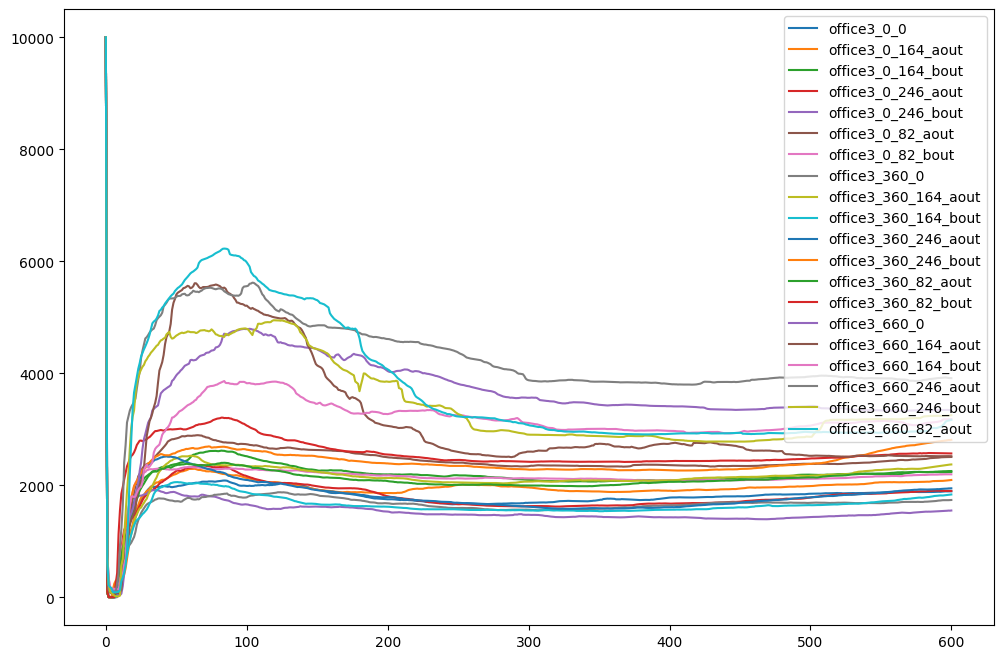

In [422]:
df_filtered = df.filter(like="office3_")
df_filtered.iloc[:,:20].plot(figsize=(12,8))

In [333]:
# s_mean = df.mean()
# s_mean.rename("countTimeMean_exceptDesk", inplace=True)

In [334]:
s_mean = df.iloc[1:].mean()
s_mean.rename("countTimeMean_exceptDesk", inplace=True)

office10_0_0            1597.804667
office10_0_164_aout     2251.458000
office10_0_164_bout     1495.050000
office10_0_246_aout     2079.937000
office10_0_246_bout     2344.236333
                           ...     
office9_960_164_bout    1237.914333
office9_960_246_aout    1572.841000
office9_960_246_bout    1397.358333
office9_960_82_aout     1294.392333
office9_960_82_bout     1453.818667
Name: countTimeMean_exceptDesk, Length: 431, dtype: float64

In [335]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")
df_summary.set_index("case_name", inplace=True)
df_summary

,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
case_name,,,,,,,,
office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276


In [337]:
df_summary = df_summary.join(s_mean)
df_summary

,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk
case_name,,,,,,,,,
office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246,2819.002667
office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804,2700.012333
office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770,1856.180333
office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532,2206.220667
office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704,2039.685667
...,...,...,...,...,...,...,...,...,...
office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128,2445.141000
office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626,3118.968667
office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276,3256.346333


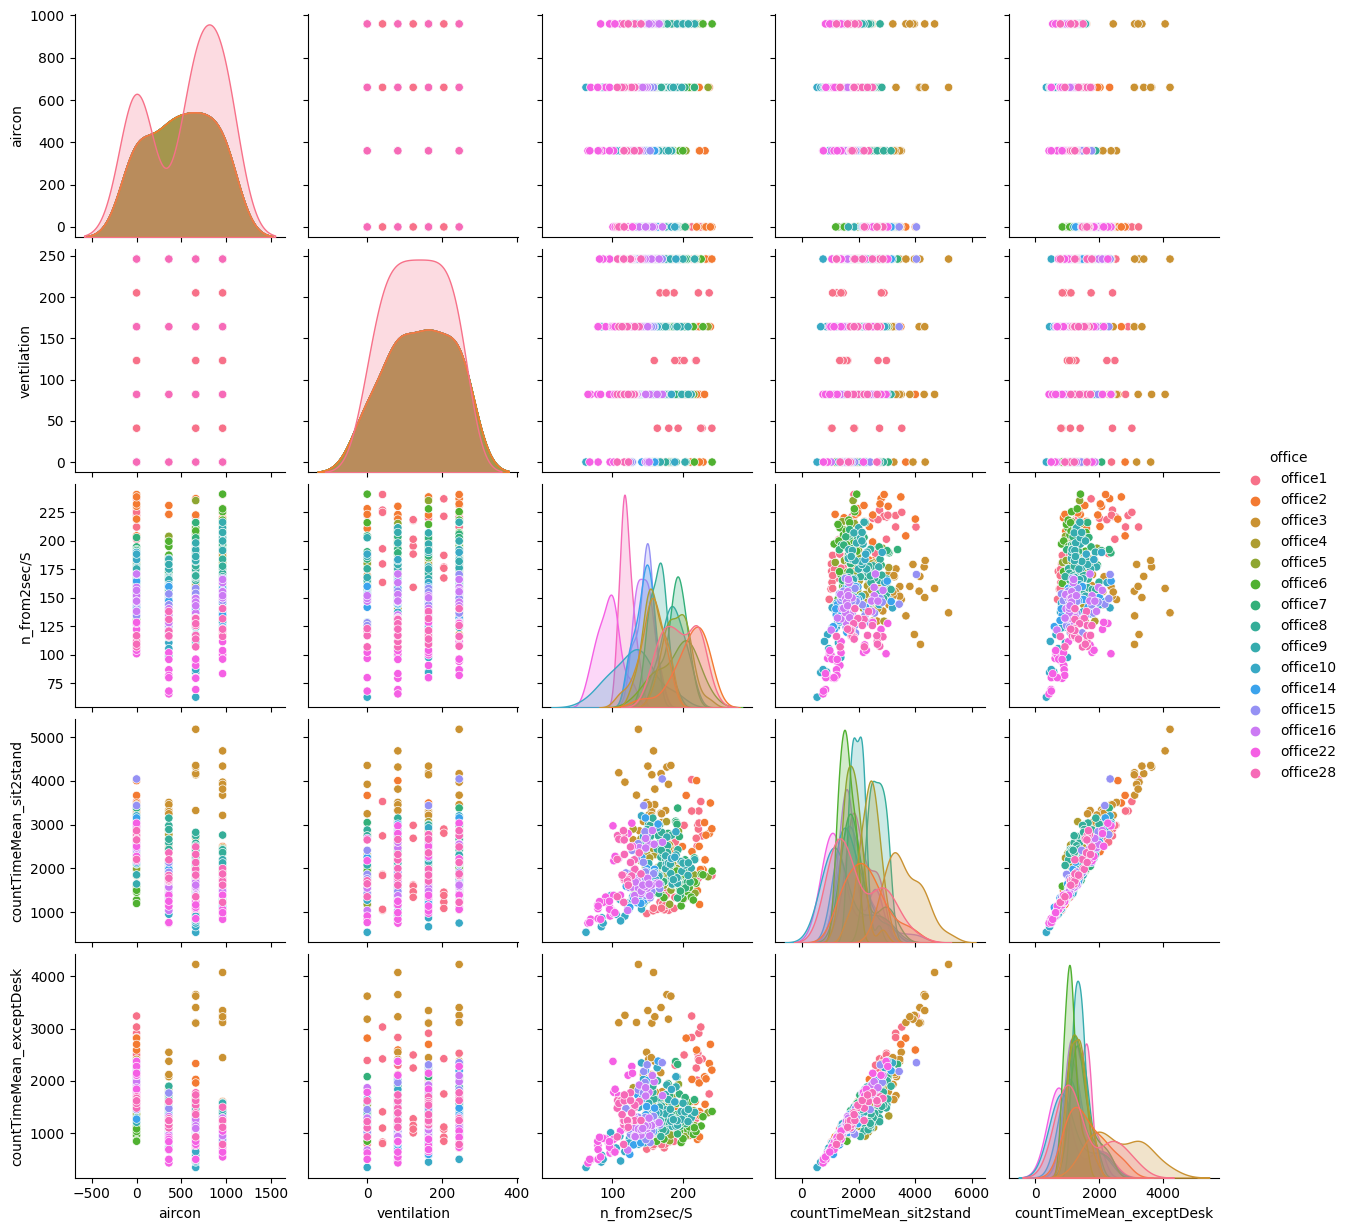

In [383]:
import seaborn as sns

sns.pairplot(df_summary[["aircon", "ventilation", "n_from2sec/S", "countTimeMean_sit2stand", "countTimeMean_exceptDesk",  "office"]], hue='office')#, diag_kind="hist")

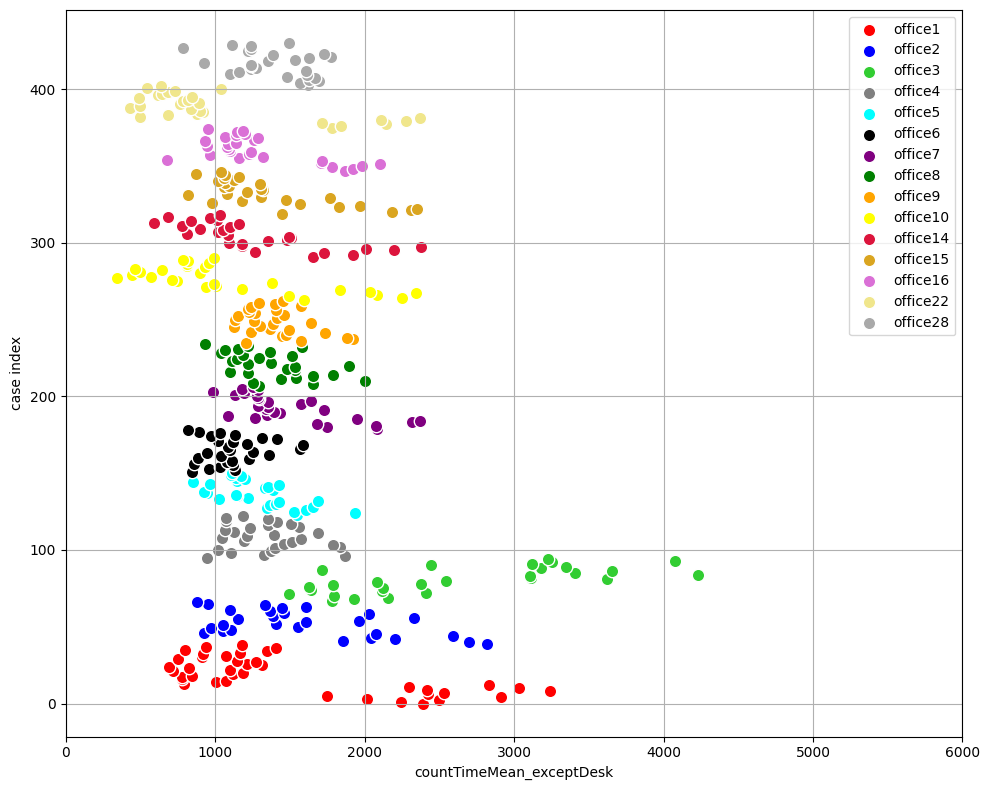

In [398]:
data_plot_overCases(df_summary, "countTimeMean_exceptDesk", x_lim=(0,6000))

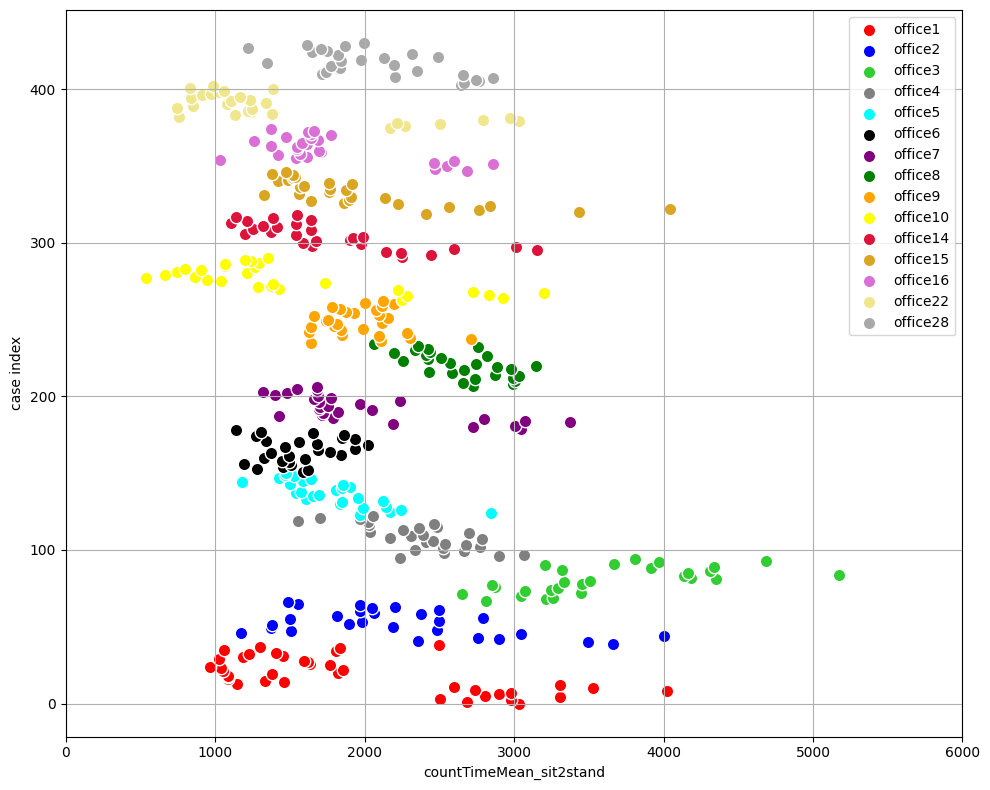

In [399]:
data_plot_overCases(df_summary, "countTimeMean_sit2stand", x_lim=(0,6000))

In [410]:
df_corr = df_summary[["aircon", "ventilation", "n_from2sec/S", "countTimeMean_sit2stand", "countTimeMean_exceptDesk"]].corr()
df_corr

,aircon,ventilation,n_from2sec/S,countTimeMean_sit2stand,countTimeMean_exceptDesk
aircon,1.000000,-0.000993,0.067739,-0.414872,-0.369955
ventilation,-0.000993,1.000000,0.026149,0.053493,0.052484
n_from2sec/S,0.067739,0.026149,1.000000,0.225968,0.256769
countTimeMean_sit2stand,-0.414872,0.053493,0.225968,1.000000,0.914766
countTimeMean_exceptDesk,-0.369955,0.052484,0.256769,0.914766,1.000000


<AxesSubplot:>

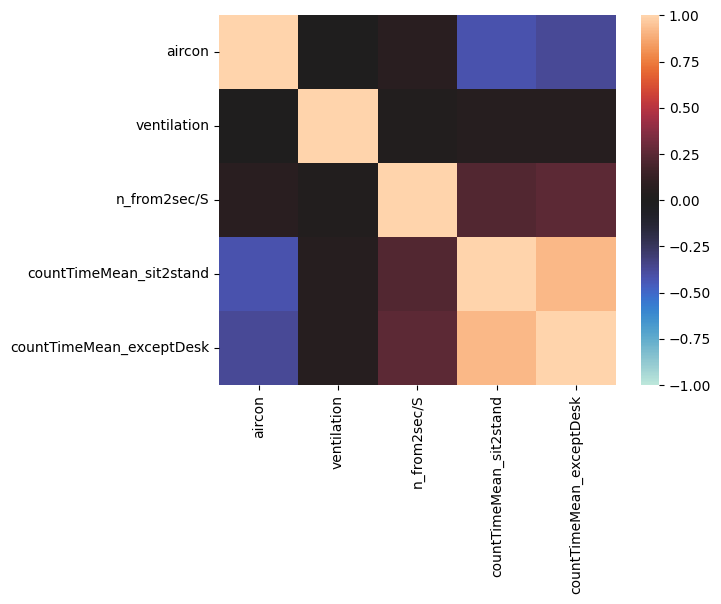

In [411]:
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [371]:
office_sorted_list = [f"office{i+1}" for i in range(33)]
office_sorted_list

['office1',
 'office2',
 'office3',
 'office4',
 'office5',
 'office6',
 'office7',
 'office8',
 'office9',
 'office10',
 'office11',
 'office12',
 'office13',
 'office14',
 'office15',
 'office16',
 'office17',
 'office18',
 'office19',
 'office20',
 'office21',
 'office22',
 'office23',
 'office24',
 'office25',
 'office26',
 'office27',
 'office28',
 'office29',
 'office30',
 'office31',
 'office32',
 'office33']

In [392]:
df_summary.reset_index(inplace=True)

In [393]:
df_summary['order'] = df_summary['office'].apply(
    lambda office: office_sorted_list.index(office) if office in office_sorted_list else -1)

df_summary = df_summary.sort_values(['order', 'case_name']).drop(columns="order")

In [401]:
df_total = df_summary
df_total["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_exceptDesk"], 4, labels=False)
# df_total["countTimeMean_bin"] = pd.qcut(df_summary["countTimeMean_sit2stand"], 4, labels=False)


df_total

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,countTimeMean_exceptDesk,countTimeMean_bin
29,office1_0_0,office1,0.0,0.0,off,7337.2,222.339394,402.713478,3034.173710,2391.085333,3
27,office1_0_123_aout,office1,0.0,123.0,a,7207.2,218.400000,530.467554,2686.293844,2246.749000,3
26,office1_0_123_bout,office1,0.0,123.0,b,6642.8,201.296970,677.838270,2981.851913,2496.447333,3
25,office1_0_164_aout,office1,0.0,164.0,a,7249.8,219.690909,410.265557,2503.411647,2013.792333,3
24,office1_0_164_bout,office1,0.0,164.0,b,7328.0,222.060606,582.445923,3309.428286,2912.489667,3
...,...,...,...,...,...,...,...,...,...,...,...
425,office28_960_164_bout,office28,960.0,164.0,b,6914.2,121.301754,381.545424,1707.855241,1240.251000,1
426,office28_960_246_aout,office28,960.0,246.0,a,6621.2,116.161404,150.166389,1221.390017,783.102333,0
427,office28_960_246_bout,office28,960.0,246.0,b,8008.6,140.501754,306.184692,1870.094842,1241.705667,1
428,office28_960_82_aout,office28,960.0,82.0,a,6985.2,122.547368,260.739434,1614.279867,1111.215667,1


In [402]:
def plot_RoI_level(df_total:pd.DataFrame):
    #オフィスごとのRoI_levelをカウントしてみる
    unique_office = df_total["office"].unique()
    classification_level = df_total["countTimeMean_bin"].nunique()
    num_RoI_level = np.zeros((len(unique_office), classification_level))#ラベルのカウント数を保存するリスト

    #各オフィスにアクセスするループ
    count = 0#ループの回数をカウントする
    for selected_office in unique_office:
        df_selected_office = df_total[df_total["office"]==selected_office]
        #各ラベルの個数カウント
        for i in range(classification_level):
            num_RoI_level[count, i] = (df_selected_office['countTimeMean_bin'] == i).sum()

        count += 1


    #グラフの描画
    colors = ("steelblue", "limegreen", "gold","orange","crimson")
    plt.figure(figsize=[12, 8]) 
    virtical = num_RoI_level#縦軸の値
    horizontal = np.arange(unique_office.shape[0])#横軸の値
    for level in range(classification_level):
        plt.bar(x=horizontal, height=virtical[:, level], tick_label=unique_office, bottom=virtical[:, :level].sum(axis=1), color=colors[level])

    plt.ylabel("count")
    plt.xlabel("office name")
    plt.legend(np.arange(classification_level), loc="best")
    plt.tight_layout()
    plt.grid()
    plt.show()

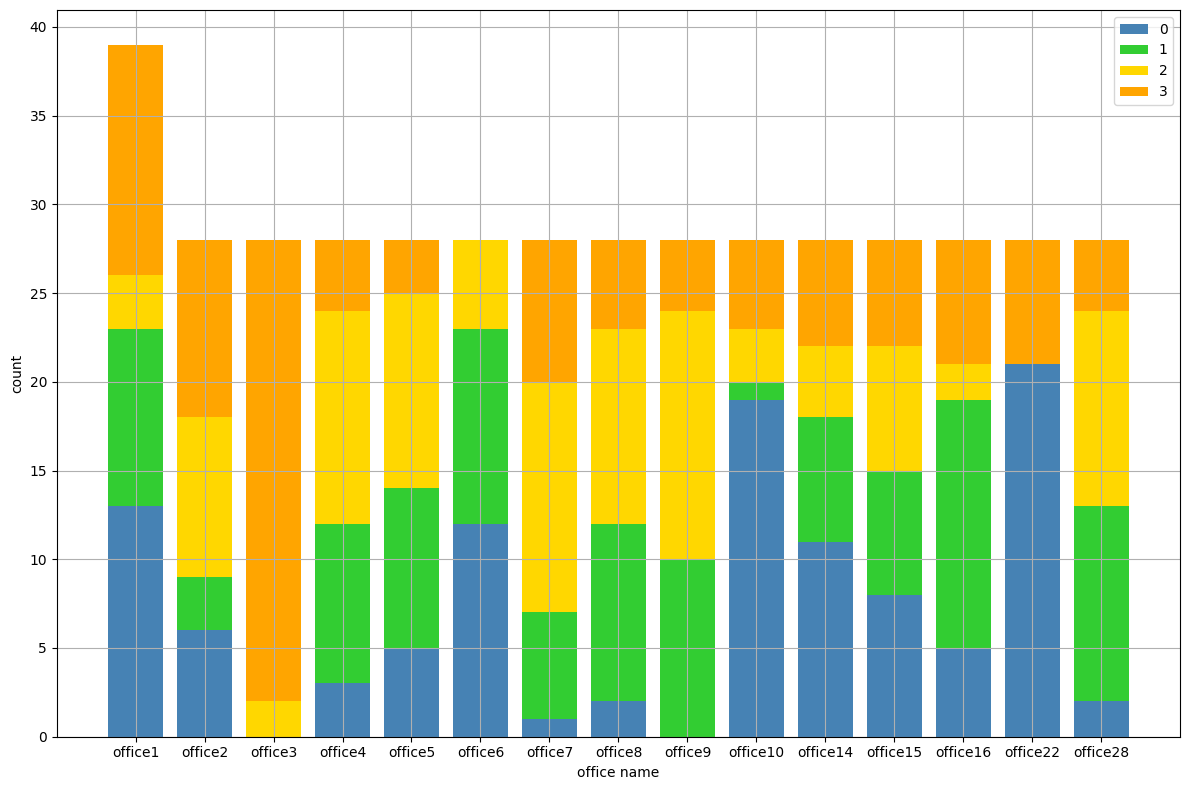

In [403]:
plot_RoI_level(df_total)

In [406]:
df_summary = df_summary.drop(columns="countTimeMean_bin")

In [409]:
df_summary.to_csv("/mnt/MachineLearning/data/summary_20230105.csv", index=False)